In [36]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [38]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [39]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [40]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [32]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [33]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [34]:
coordinates

[(6.862446596035625, 41.844765760410866),
 (-40.03201599608986, 78.53142441222576),
 (-27.851992098795897, -97.51099230612375),
 (-51.05932213720466, -123.91264897830908),
 (10.268752494163337, 155.57406949527712),
 (-79.13293029501237, -65.22134503075839),
 (-89.97842223332852, -109.52761555243525),
 (7.257221357720468, 42.899497566983115),
 (-81.97813365323717, 2.608051485327053),
 (-3.357927718833224, -139.48551246707783),
 (-67.05811038626683, -59.83671344738627),
 (22.713959486234018, 8.264796235434972),
 (-60.81559100328534, -146.60211111071396),
 (-84.87977301149176, -14.655341559128516),
 (31.644151406766596, 126.66324076339134),
 (77.17433193017183, -49.100876466211275),
 (9.85700972003906, 46.79212739872645),
 (-80.75804336087751, 4.199850182450604),
 (86.15151711593353, -154.26985046940464),
 (-31.575024564564686, 49.84921225349473),
 (87.9336299541942, -33.096849995026304),
 (83.00392385645961, -119.86992804966903),
 (-17.303572605087837, 176.31064846681363),
 (71.994251770

In [35]:
# Create a list for holding the cities.
cities = []
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count.
len(cities)

615

In [ ]:
# Create an empty list to hold the weather data.
# city_data = []
# Print the beginning of the logging.
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# Create counters.
# record_count = 1
# set_count = 1

In [42]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
          
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ginir
Processing Record 2 of Set 1 | mahebourg
Processing Record 3 of Set 1 | pisco
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | kavieng
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | jijiga
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | gat
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | fukue
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | odweyne
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | isangel
Processing Record 22 of Set 1 | belushy

Processing Record 34 of Set 4 | kahului
Processing Record 35 of Set 4 | huazolotitlan
City not found. Skipping...
Processing Record 36 of Set 4 | poum
Processing Record 37 of Set 4 | maceio
Processing Record 38 of Set 4 | east london
Processing Record 39 of Set 4 | schrems
Processing Record 40 of Set 4 | redlands
Processing Record 41 of Set 4 | saskylakh
Processing Record 42 of Set 4 | killybegs
Processing Record 43 of Set 4 | dharmavaram
Processing Record 44 of Set 4 | kaitangata
Processing Record 45 of Set 4 | kasongo
Processing Record 46 of Set 4 | sioux lookout
Processing Record 47 of Set 4 | lagdo
Processing Record 48 of Set 4 | tecoanapa
Processing Record 49 of Set 4 | bengkulu
Processing Record 50 of Set 4 | brae
Processing Record 1 of Set 5 | oktyabrskoye
Processing Record 2 of Set 5 | karaton
Processing Record 3 of Set 5 | margate
Processing Record 4 of Set 5 | oxbow
Processing Record 5 of Set 5 | mount gambier
Processing Record 6 of Set 5 | methven
Processing Record 7 of Set 

Processing Record 24 of Set 8 | seminole
Processing Record 25 of Set 8 | lufilufi
Processing Record 26 of Set 8 | lisala
Processing Record 27 of Set 8 | khonuu
City not found. Skipping...
Processing Record 28 of Set 8 | half moon bay
Processing Record 29 of Set 8 | batagay
Processing Record 30 of Set 8 | kindu
Processing Record 31 of Set 8 | mulchen
Processing Record 32 of Set 8 | rio grande
Processing Record 33 of Set 8 | khorramshahr
Processing Record 34 of Set 8 | asau
Processing Record 35 of Set 8 | sambava
Processing Record 36 of Set 8 | shimoda
Processing Record 37 of Set 8 | arkhipo-osipovka
Processing Record 38 of Set 8 | polewali
Processing Record 39 of Set 8 | oistins
Processing Record 40 of Set 8 | arkhara
Processing Record 41 of Set 8 | rungata
City not found. Skipping...
Processing Record 42 of Set 8 | tucuman
Processing Record 43 of Set 8 | praia
Processing Record 44 of Set 8 | ambon
Processing Record 45 of Set 8 | mangai
Processing Record 46 of Set 8 | diffa
Processing R

Processing Record 14 of Set 12 | man
Processing Record 15 of Set 12 | ukiah
Processing Record 16 of Set 12 | kegayli
City not found. Skipping...
Processing Record 17 of Set 12 | nizhnevartovsk
Processing Record 18 of Set 12 | lai
Processing Record 19 of Set 12 | olafsvik
Processing Record 20 of Set 12 | zhezkazgan
Processing Record 21 of Set 12 | lienz
Processing Record 22 of Set 12 | khormuj
City not found. Skipping...
Processing Record 23 of Set 12 | piacabucu
Processing Record 24 of Set 12 | davila
Processing Record 25 of Set 12 | kapoeta
Processing Record 26 of Set 12 | kodama
Processing Record 27 of Set 12 | lesnoy
Processing Record 28 of Set 12 | yashkul
Processing Record 29 of Set 12 | isetskoye
Processing Record 30 of Set 12 | shakawe
Processing Record 31 of Set 12 | sumbe
Processing Record 32 of Set 12 | srednekolymsk
Processing Record 33 of Set 12 | monroe
Processing Record 34 of Set 12 | noumea
Processing Record 35 of Set 12 | tateyama
Processing Record 36 of Set 12 | mujiay

In [43]:
len(city_data)

560

In [44]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ginir,7.1333,40.7000,59.54,78,72,12.12,ET,2021-07-23 21:48:27
1,Mahebourg,-20.4081,57.7000,68.29,83,75,5.75,MU,2021-07-23 21:48:28
2,Pisco,-13.7000,-76.2167,64.45,72,40,17.27,PE,2021-07-23 21:44:38
3,Rikitea,-23.1203,-134.9692,71.35,60,88,13.35,PF,2021-07-23 21:44:11
4,Kavieng,-2.5744,150.7967,82.80,78,15,15.21,PG,2021-07-23 21:48:28
5,Ushuaia,-54.8000,-68.3000,37.06,87,40,19.57,AR,2021-07-23 21:48:29
6,Punta Arenas,-53.1500,-70.9167,37.51,87,40,17.27,CL,2021-07-23 21:48:29
7,Jijiga,9.3500,42.8000,65.35,69,90,19.51,ET,2021-07-23 21:48:29
8,Hermanus,-34.4187,19.2345,48.90,76,0,12.19,ZA,2021-07-23 21:48:29
9,Atuona,-9.8000,-139.0333,77.32,76,40,11.41,PF,2021-07-23 21:48:30


In [49]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [51]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ginir,ET,2021-07-23 21:48:27,7.1333,40.7000,59.54,78,72,12.12
1,Mahebourg,MU,2021-07-23 21:48:28,-20.4081,57.7000,68.29,83,75,5.75
2,Pisco,PE,2021-07-23 21:44:38,-13.7000,-76.2167,64.45,72,40,17.27
3,Rikitea,PF,2021-07-23 21:44:11,-23.1203,-134.9692,71.35,60,88,13.35
4,Kavieng,PG,2021-07-23 21:48:28,-2.5744,150.7967,82.80,78,15,15.21
5,Ushuaia,AR,2021-07-23 21:48:29,-54.8000,-68.3000,37.06,87,40,19.57
6,Punta Arenas,CL,2021-07-23 21:48:29,-53.1500,-70.9167,37.51,87,40,17.27
7,Jijiga,ET,2021-07-23 21:48:29,9.3500,42.8000,65.35,69,90,19.51
8,Hermanus,ZA,2021-07-23 21:48:29,-34.4187,19.2345,48.90,76,0,12.19
9,Atuona,PF,2021-07-23 21:48:30,-9.8000,-139.0333,77.32,76,40,11.41


In [52]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [53]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

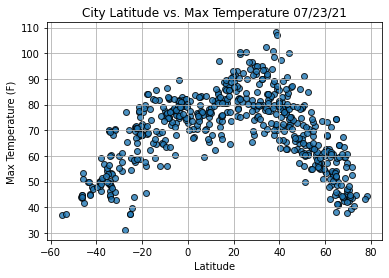

In [54]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

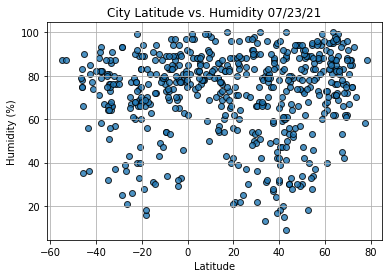

In [55]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

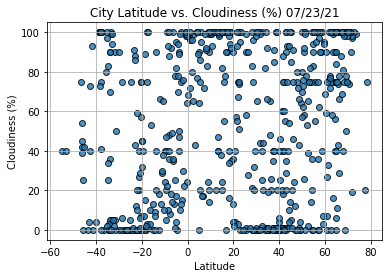

In [56]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

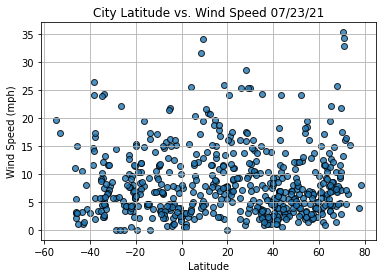

In [57]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()